In [67]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



Acurácia: 0.88


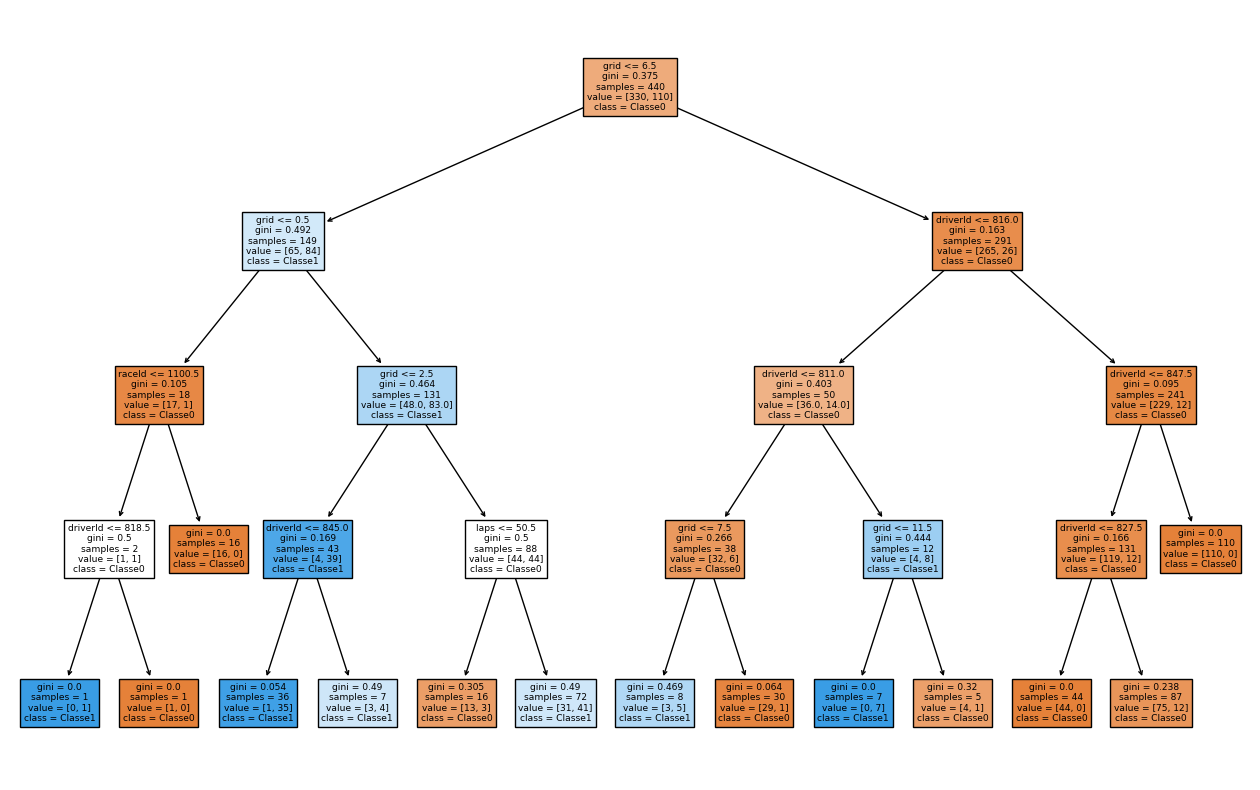

,raceId,driverId,grid,points,laps,year,forename,surname,target
0,1098,830,1,25,57,2023,Max,Verstappen,1
1,1098,815,2,18,57,2023,Sergio,Pérez,1
2,1098,4,5,15,57,2023,Fernando,Alonso,1
3,1098,832,4,12,57,2023,Carlos,Sainz,1
4,1098,1,7,10,57,2023,Lewis,Hamilton,1
...,...,...,...,...,...,...,...,...,...
674,1132,839,18,0,50,2024,Esteban,Ocon,0
675,1132,815,0,0,50,2024,Sergio,Pérez,0
676,1132,855,14,0,50,2024,Guanyu,Zhou,0
677,1132,847,1,0,33,2024,George,Russell,0


In [68]:
# Carregar o dataset (substitua 'dadosFiltrados.xlsx' pelo caminho do seu arquivo)
df = pd.read_excel('dadosFiltrados.xlsx', usecols=['raceId', 'driverId', 'grid', 'points', 'laps', 'year','forename','surname'])

# Criar a nova coluna 'target' com base nos pontos
df['target'] = df['points'].apply(lambda x: 1 if x >= 10 else 0)

# Filtrar os dados de 2023 para treinamento e dados de 2024 para teste
df_train = df[df['year'] == 2023]
df_test = df[df['year'] == 2024]

# Definir variáveis de entrada (X) e variável alvo (y) para treino e teste
X_train = df_train[['raceId', 'driverId','laps','grid']]
y_train = df_train['target']
X_test = df_test[['raceId', 'driverId','laps','grid']]
y_test = df_test['target']

# Criar e treinar o modelo de árvore de decisão
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Fazer previsões e avaliar o modelo
y_pred = clf.predict(X_test)
print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")

# Visualizar a árvore de decisão
plt.figure(figsize=(16, 10))
plot_tree(clf, feature_names=X_train.columns, class_names=['Classe0', 'Classe1'], filled=True)
plt.show()

In [73]:

# Certifique-se de que df_test seja uma cópia do DataFrame original
df_test = df_test.copy()

# Obter as previsões para os dados de 2024
df_test.loc[:, 'predicted_target'] = clf.predict(X_test)

# Agora, podemos agrupar por 'driverId' e calcular a média da 'predicted_target' para cada piloto.
# Isso nos dará a chance média de cada piloto obter pontos acima de 10.

pilotos_probabilidade = df_test.groupby(['driverId', 'forename', 'surname']).agg({'predicted_target': 'mean'}).reset_index()

# Ordenar os pilotos pela probabilidade de obter pontos (predicted_target) em ordem decrescente
pilotos_probabilidade = pilotos_probabilidade.sort_values(by='predicted_target', ascending=False)

# Mostrar os 10 pilotos com maior chance de obter pontos em 2025
print("Pilotos com maior chance de obter pontos em 2025:")
print(pilotos_probabilidade.head(10))


Pilotos com maior chance de obter pontos em 2025:
    driverId  forename     surname  predicted_target
7        830       Max  Verstappen          1.000000
13       846     Lando      Norris          0.833333
12       844   Charles     Leclerc          0.750000
8        832    Carlos       Sainz          0.727273
3        815    Sergio       Pérez          0.666667
18       857     Oscar     Piastri          0.666667
14       847    George     Russell          0.583333
0          1     Lewis    Hamilton          0.500000
1          4  Fernando      Alonso          0.333333
2        807      Nico  Hülkenberg          0.083333
